In [1]:
#authors: 
#objective: 
#input: 
#output:
import pandas as pd #data analysis toolkit
import matplotlib.pyplot as plt # for plotting graphs
import numpy as np # for high level computations
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler # standardization of values
from sklearn.preprocessing import MinMaxScaler # Normalization of values
from sklearn.model_selection import train_test_split # to split data
from sklearn.neighbors import KNeighborsClassifier #KNN classifier
from sklearn.metrics import confusion_matrix,accuracy_score # to get confusion matrix and accuracy
from sklearn.model_selection import cross_val_score # to perform evaluation and cross-validation

In [3]:
data_set = pd.read_csv("train5.csv") # dataset_input

In [4]:
data_set = np.round(data_set, decimals=2) # rouding all values in dataset to 2 decimal places
data_co=data_set.head(5000) # first 5 values in dataset

In [5]:
dset_modified=data_co.drop('Credit_Score',axis=1)

In [6]:
data_set_feat = pd.DataFrame(dset_modified, columns=data_co.columns[:-1])

In [7]:
data_set_feat = np. round(data_set_feat, decimals=2)

In [8]:
one_train, one_test, two_train, two_test = train_test_split(data_co,data_co['Credit_Score'],test_size=0.30)
# test_train split with test size =30% and train size =70%

In [10]:
# Computation of accuracy rates for various neighbour values
Accurate_rates = []
for i in range(1,40):
    k_nearest_neighbour = KNeighborsClassifier(n_neighbors=i)
    final_score=cross_val_score(k_nearest_neighbour, data_set_feat,data_co['Credit_Score'],cv=5)
    Accurate_rates.append(final_score.mean())

Text(0, 0.5, 'Accuracy Rate')

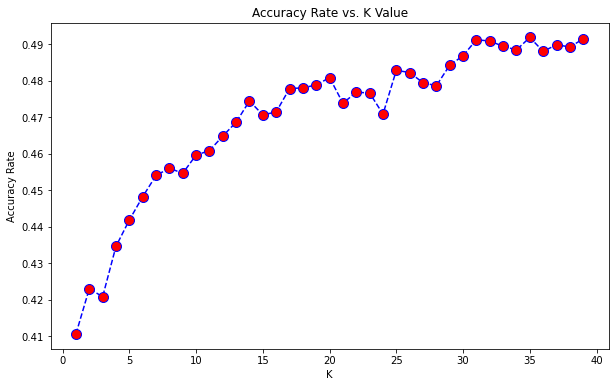

In [11]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),Accurate_rates, color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel( 'Accuracy Rate')

In [12]:
# Best case identifier
max_index = Accurate_rates.index(max(Accurate_rates)) 
k_nearest_neighbour = KNeighborsClassifier(n_neighbors=(max_index+1))
k_nearest_neighbour.fit(one_train,two_train)
prediction = k_nearest_neighbour.predict(one_test)
print('For K=',max_index)
print('Confusion matrix:')
print('\n')
print(confusion_matrix(two_test,prediction)) # Confusion Matrix
print('\n')
print('Accuracy rate: ',round(accuracy_score(two_test,prediction),2)*100,'%')
#Accuracy rate

For K= 34
Confusion matrix:


[[176 282   6]
 [113 617  24]
 [ 28 198  56]]


Accuracy rate:  56.99999999999999 %


In [13]:
t = 30 # Random K value

k_nearest_neighbour = KNeighborsClassifier(n_neighbors=t)
k_nearest_neighbour. fit(one_train, two_train)
prediction = k_nearest_neighbour.predict(one_test)

print('For K=',t)

print('Confusion matrix:')

print('\n')

print (confusion_matrix(two_test, prediction) )
print('\n')
print('Accuracy rate:',round(accuracy_score(two_test,prediction),2)*100,'%')


For K= 30
Confusion matrix:


[[197 258   9]
 [121 598  35]
 [ 30 189  63]]


Accuracy rate: 56.99999999999999 %


In [14]:
scaled = MinMaxScaler()

In [16]:
scaled. fit(data_co.drop('Credit_Score',axis=1))

MinMaxScaler()

In [17]:
dset_modified=scaled. transform(data_co.drop('Credit_Score',axis=1)) #dropping class—feature

In [18]:
data_set_feat = pd.DataFrame(dset_modified, columns=data_co.columns[:-1])

In [19]:
data_set_feat = np.round(data_set_feat, decimals=2) #rounding all values to 2 decimals
data_set_feat.head() #dataset_after_normalization

,Unnamed: 0,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0.0,0.29,0.13,0.87,0.0,0.27,0.03,0.04,0.03,0.08,...,0.0,0.5,0.16,0.45,0.00,0.5,0.0,0.01,0.50,0.19
1,0.0,0.86,0.43,0.87,0.0,0.27,0.03,0.04,0.03,0.08,...,0.0,0.5,0.16,0.32,0.66,0.5,0.0,0.01,0.67,0.22
2,0.0,0.00,0.13,0.87,0.0,0.27,0.03,0.04,0.03,0.08,...,0.0,0.5,0.16,0.43,0.66,0.5,0.0,0.02,0.83,0.15
3,0.0,1.00,0.13,0.87,0.0,0.10,0.03,0.04,0.03,0.08,...,0.0,0.5,0.16,0.18,0.67,0.5,0.0,0.00,0.17,0.22
4,0.0,0.71,0.13,0.87,0.0,0.27,0.03,0.04,0.03,0.08,...,0.0,0.5,0.16,0.27,0.67,0.5,0.0,0.01,1.00,0.22


In [21]:
one_train, one_test, two_train, two_test = train_test_split(data_co,data_co['Credit_Score'],test_size=0.30)
# test_train split with test size =30% and train size =70%

In [22]:
# Computation of accuracy rates for various neighbour values
Accurate_rates = []
for i in range(1,40):
    k_nearest_neighbour = KNeighborsClassifier(n_neighbors=i)
    final_score=cross_val_score(k_nearest_neighbour, data_set_feat,data_co['Credit_Score'],cv=10)
    Accurate_rates.append(final_score.mean())

Text(0, 0.5, 'Accuracy Rate')

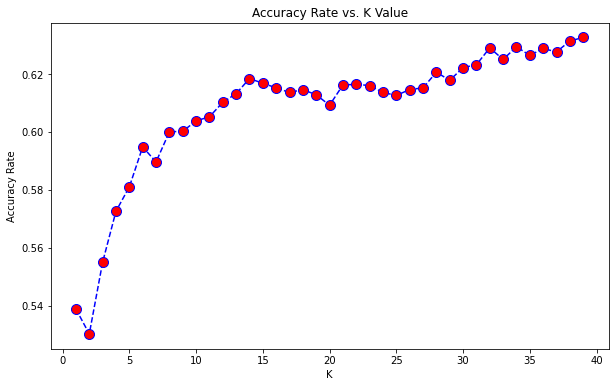

In [24]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),Accurate_rates, color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel( 'Accuracy Rate')

In [25]:
max(Accurate_rates)

0.6325999999999999